# __Maschinelle Intelligenz und Gesellschaft__

## Group Project

#### This group is made of the following members (in no particular order):

|     ID Student     |     Name     |     Fach     |
|     :----:     |     :----:     |     :----:     |
|     03754729      |     Chongjin Ren     |     B.sc. Elektrotechnik und Informationstechnik     |
|     03754516      |     Xiangyu Jin     |     B.sc. Elektrotechnik und Informationstechnik     |
|     03769264      |     Claudia Visintin     |     M.sc. Politics&Technology     |
|     03768476      |     Julia Strohmenger      |     M.sc. Politics&Technology     |

---

# Uploading the packages:

In [1]:
# -*- coding:utf-8 -*-
"""
Datum  : 31.08.2023
"""

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import tensorflow as tf

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline

2023-09-16 08:05:42.162916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

# 1. Processing and cleaning of data.

### a. Uploading the data

In [2]:
dataset = pd.read_csv('NC_policing.csv', low_memory=False)
dataset.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3


### b. Read the value of each feature in the csv file

In [3]:
def print_unique(dataset, col_names):
    for col in col_names:
        print(col, ': ', dataset[col].unique())

columns = ['state', 'stop_date', 'driver_gender', 'driver_age', 'driver_race_raw',
           'driver_race', 'violation', 'search_type', 'contraband_found',
           'stop_outcome', 'search_basis', 'officer_id', 'drugs_related_stop',
           'district']
print_unique(dataset, columns)

state :  ['NC']
stop_date :  ['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
driver_gender :  ['M' 'F']
driver_age :  [23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
driver_race_raw :  ['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
driver_race :  ['White' 'Black' 'Hispanic' 'Other' 'Asian']
violation :  ['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
search_type :  ['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
contraband_found :  [False  True]
stop_outcome :  ['Arrest' 'No Action']
search_basis :  ['No Search Conducted' 'Observation

### c. Check and correct missing values in the dataset. 

In [4]:
dataset.isnull().sum()

state                      0
stop_date                  0
driver_gender              0
driver_age                91
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

In [5]:
# Die "Not A Number" bei dem Feature "drugs_related_stop" 
# bedeutet einfach "Falsch". Wir werden sie durch " Falsch" ersetzen.
dataset['drugs_related_stop'].fillna(False, inplace=True)


# Die "missing values" haben wir aus der Liste weggenommen. 
# Die Anzahlen sind gering und deswegen haben sie  nur wenige Einfluss. 
# Maximalerweise werden nur 91+38=129 Zeilen weggelöscht.

# Using the dropna() method to remove rows containing missing values:
dataset_cleaned = dataset.dropna().reset_index(drop=True)

# Printing the cleaned DataFrame after removing missing values:
#print("\nDataFrame after removing missing values:")
dataset_cleaned.head()

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,False,E3


In [6]:
# Wir nehmen das Feature "stop_outcome" raus als unsere Zieldaten "y".
# Wir möchten vorhersagen, ob man arrested oder nicht.
# Später werden wir unsere Prädiktion mit "y" vergleichen.
y = dataset_cleaned['stop_outcome']

## warum lösschbar
# state: Das Feature "state" können wir wegnehmen, weil es nur um ein State "NC" handelt. 

# officer_id: Das Feature "officer_id" möchten wir auch weglöschen. 
# Es gibt natürlich "freundlichere" oder "strengere" Officers, 
# aber jeder Mensch trifft sich zufällig mit unterschiedlichen Officers. 
# Für die Gerechtigkeit allgemeine sind diese Daten aber zu übergenau, also brauchen wir nicht.

#search_basis: 

# driver_race_raw: Die Zusammenhang von "driver_race_raw" 
# und "driver_race" und deren Anzahl sind anbei:
# WN -> White 258525
# BN -> Black 102919
# UH -> Hispanic 26727
# WH -> Hispanic 3479
# IN -> Other 3666
# UN -> Other 4487
# AN -> Asien 1775
# AH -> Hispanic 30
# BH -> Hispanic 422
# IH -> Hispanic 57
# Wir denken, dass Feature "driver_race" schon die Eigenschaft gut genug zusammenfasst. 
# Zu vereinfachen nutzen wir nur "driver_race".

X_all = dataset_cleaned.drop(['state', 'officer_id', 'driver_race_raw', 'search_basis', 'stop_outcome'], axis=1)

print(y.head())
print(len(X_all))

0    Arrest
1    Arrest
2    Arrest
3    Arrest
4    Arrest
Name: stop_outcome, dtype: object
401958


## d. Encoding categorical attributes.

In [7]:
# Wir schauen, welche Beispielen jedem Feature hat,
# damit können wir uns entschieden, ob wir LabelEncoder oder one-hot encoding benutzen.


# "y" ist jetzt nicht binär, deshalb brauchen wir Label Encoder.

encoder = LabelEncoder()

y_enc_zwi = encoder.fit_transform(y)
y_enc = pd.Series(y_enc_zwi, name='stop_outcome')

pd.DataFrame(data={'stop_outcome': y, 'stop_outcome': y_enc})
y_enc.head()
#print(len(y_enc))

0    0
1    0
2    0
3    0
4    0
Name: stop_outcome, dtype: int64

In [8]:
# Für das Feature "stop_date" brauchen wir Daten,  damit wir den Trend kennenlernen. 
# Deshalb brauchen wir nur die Daten jedes Jahr. 
# Die Informationen über Monaten und Tagen können wir weglöschen
X_all['stop_date'] = pd.to_datetime(X_all['stop_date'])
X_all['year'] = X_all['stop_date'].dt.year
X_all.drop(columns=['stop_date'], inplace=True)

In [9]:
# Für die Features "driver_race" nutzen wir one-hot encoding.
X_onehot = X_all[['driver_race']]
X_onehot_enc = pd.get_dummies(X_onehot, prefix=['driver_race'])
X_all.drop(columns=['driver_race'], inplace=True)

# Für die andere Features nutzen wir LabelEncoder.
for col in X_all:
    if col=='driver_age' or col=='year':
        pass
    else:
        X_all[col] = encoder.fit_transform(X_all[col])

# Für die Features "stop_date", "driver_age" brauchen wir noch Scaler. Nutzen wir hier StandardScaler.
scaler = StandardScaler()

#X_scaler_1 = X_all[['year']]
#X_scaler_2 = X_all[['driver_age']]

#X_scaler_1.values[:] = scaler.fit_transform(X_scaler_1)
#X_scaler_2.values[:] = scaler.fit_transform(X_scaler_2)

X_all[['year']] = scaler.fit_transform(X_all[['year']])
X_all[['driver_age']] = scaler.fit_transform(X_all[['driver_age']])

#zusammenfassen
X_enc = pd.concat((X_onehot_enc, X_all), axis=1, join='inner')

#X_enc.drop(columns=['year'], inplace=True)
#X_enc = pd.concat((X_scaler_1, X_onehot_enc), axis=1, join='inner')


X_enc.head()
#print(X_enc.isnull().sum())
#print(len(X_enc))
#print(X_enc.head(402086))

,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,driver_gender,driver_age,violation,search_type,contraband_found,drugs_related_stop,district,year
0,False,False,False,False,True,1,-1.450042,6,2,0,0,34,-2.695085
1,False,False,False,False,True,0,-0.989176,6,2,0,0,34,-2.695085
2,False,True,False,False,False,0,0.547043,6,2,0,0,34,-2.695085
3,False,True,False,False,False,1,-0.989176,6,2,0,0,34,-2.695085
4,False,False,True,False,False,1,-1.373231,6,2,0,0,34,-2.695085


### e. Korrelationsmatrix

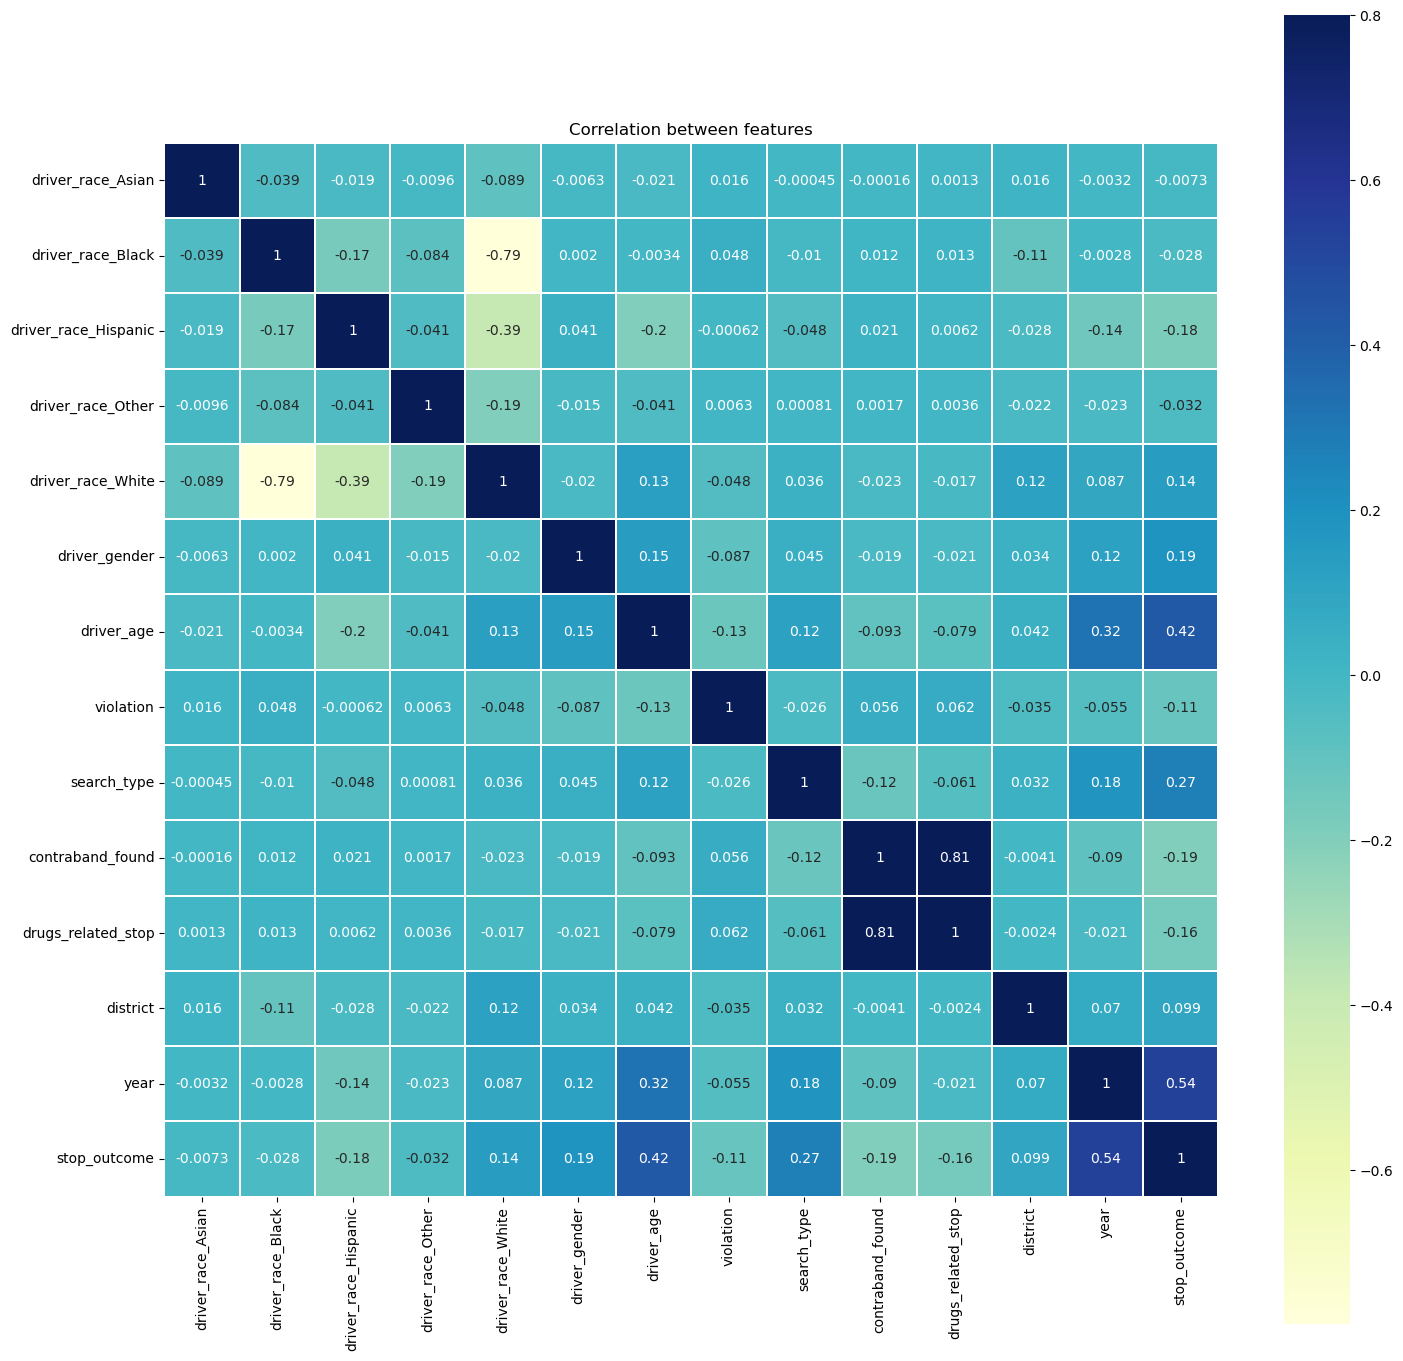

In [10]:
## Korrelationsmatrix

#creating correlation matrix for feature selection
corr = X_enc.join(y_enc).corr()
fig_01 = plt.figure(figsize=(17, 17))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation between features')
plt.show()

---

# 2. two Classifier: KNN and Neural Network

# KNN

In [11]:
X_enc = X_enc.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)

# Creating a scaler object (here with default settings)
scaler = StandardScaler()

# Replacing the values in our X_train by the normalized ones
X_train_norm = X_train.copy()
X_train_norm.values[:] = scaler.fit_transform(X_train)

# Replacing the values in our X_test by the normalized ones
X_test_norm = X_test.copy()
X_test_norm.values[:] = scaler.transform(X_test)




print(X_train_norm.head)
print(y_train.head)

(321566, 13)
(80392, 13)
<bound method NDFrame.head of         driver_race_Asian  driver_race_Black  driver_race_Hispanic   
380508          -0.066811           1.705969             -0.288373  \
191454          -0.066811          -0.586177             -0.288373   
276033          -0.066811          -0.586177             -0.288373   
29124           -0.066811          -0.586177              3.467736   
175872          -0.066811          -0.586177             -0.288373   
...                   ...                ...                   ...   
259178          -0.066811          -0.586177             -0.288373   
365838          -0.066811          -0.586177             -0.288373   
131932          -0.066811          -0.586177              3.467736   
146867          14.967587          -0.586177             -0.288373   
121958          -0.066811          -0.586177             -0.288373   

        driver_race_Other  driver_race_White  driver_gender  driver_age   
380508           -0.14396    

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

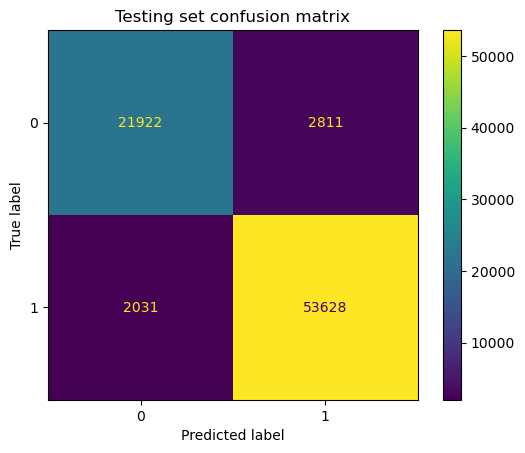

In [13]:
y_test_pred = knn.predict(X_test_norm)

fig_ = plt.figure()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Testing set confusion matrix')

plt.show()

In [14]:
#True/false positives/negatives of the kNN
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test, y_test_pred).ravel()
print('True Positive of KNN:\t', tp_knn)
print('True Negative of KNN:\t',tn_knn)
print('False Positive of KNN:\t', fp_knn)
print('False Negative of KNN:\t', fn_knn)

True Positive of KNN:	 53628
True Negative of KNN:	 21922
False Positive of KNN:	 2811
False Negative of KNN:	 2031


### a. Precision-Recall-Curves

In [15]:
from sklearn import metrics
#Accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
print('The Accuracy:',round(accuracy_knn,2))

The Accuracy: 0.94


In [16]:
#Standard metrics of performance: recall and precision
recall_knn_manual = tp_knn/(tp_knn + fn_knn)
precision_knn_manual = tp_knn/(tp_knn + fp_knn)

print('Recall of KNN:\t\t',round(recall_knn_manual,2))
print('Precision of KNN:\t',round(precision_knn_manual,2))

#F1 metric of performance
f1_knn_manual = 2 * precision_knn_manual * recall_knn_manual / (precision_knn_manual + recall_knn_manual)

print('F1 of KNN:\t\t',round(f1_knn_manual,2))

Recall of KNN:		 0.96
Precision of KNN:	 0.95
F1 of KNN:		 0.96


[0.  0.2 0.4 0.6 0.8 1. ]


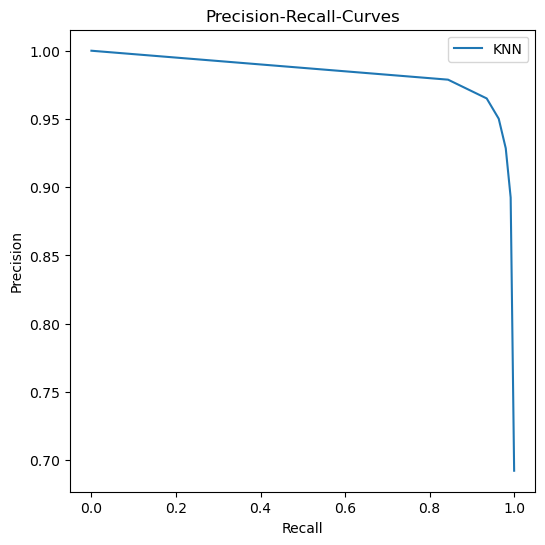

In [17]:
from sklearn.metrics import precision_recall_curve

cm_proba_test = knn.predict_proba(X_test_norm)[:, 1]
cm_proba_train = knn.predict_proba(X_train_norm)[:, 1]

precision_knn, recall_knn, thresholds = precision_recall_curve(y_test, cm_proba_test)

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

### c. ROC curve

Train: [2.  1.  0.8 0.6 0.4 0.2 0. ]
Test: [2.  1.  0.8 0.6 0.4 0.2 0. ]


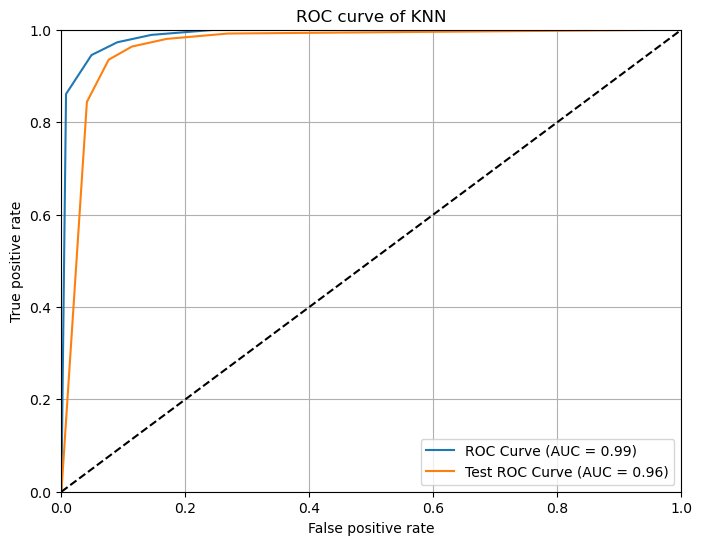

In [18]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train_knn, tpr_train_knn, thresholds_train = roc_curve(y_train, cm_proba_train)
print('Train:',thresholds_train)
fpr_test_knn, tpr_test_knn, thresholds_test = roc_curve(y_test, cm_proba_test)
print('Test:',thresholds_test)

#Calculate the area under the curve
auc_train_knn = auc(fpr_train_knn, tpr_train_knn)
auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_knn, tpr_train_knn, label=f'ROC Curve (AUC = {auc_train_knn:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'Test ROC Curve (AUC = {auc_test_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Neural network

In [21]:
X_enc = X_enc.astype(np.float32)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_enc, y_enc, test_size=0.2, stratify=y, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, stratify=y_train_valid, random_state=42)

# print(X_train.shape)
# print(X_test.shape)
# print(X_valid.shape)

In [25]:
# Creating a scaler object (here with default settings)
scaler = StandardScaler()

# Replacing the values in our X_train by the normalized ones
X_train_norm = X_train.copy()
X_train_norm.values[:] = scaler.fit_transform(X_train)

# Replacing the values in our X_test by the normalized ones
X_test_norm = X_test.copy()
X_test_norm.values[:] = scaler.transform(X_test)

# Replacing the values in our X_val by the normalized ones
X_valid_norm = X_valid.copy()
X_valid_norm.values[:] = scaler.transform(X_valid)

X_valid_norm

,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,driver_gender,driver_age,violation,search_type,contraband_found,drugs_related_stop,district,year
281869,-0.067131,-0.585474,-0.28882,-0.144354,0.745399,0.322848,-1.524782,-0.170768,0.184795,-0.129569,-0.104394,1.352421,0.449836
270528,-0.067131,-0.585474,-0.28882,-0.144354,0.745399,0.322848,0.316859,-0.170768,0.184795,-0.129569,-0.104394,0.685389,0.449836
162464,-0.067131,-0.585474,-0.28882,-0.144354,0.745399,0.322848,-0.834167,-0.170768,0.184795,-0.129569,-0.104394,-0.951872,0.187450
345069,-0.067131,-0.585474,-0.28882,-0.144354,0.745399,-3.097430,0.009919,1.828847,0.184795,-0.129569,-0.104394,-1.679543,0.974606
361729,-0.067131,1.708018,-0.28882,-0.144354,-1.341563,-3.097430,-0.603961,-1.503844,0.184795,-0.129569,-0.104394,0.806667,0.974606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125167,-0.067131,-0.585474,-0.28882,-0.144354,0.745399,0.322848,-1.754987,-1.503844,4.763596,-0.129569,-0.104394,-0.648676,-0.074935
138263,-0.067131,1.708018,-0.28882,-0.144354,-1.341563,-3.097430,0.240124,0.495771,0.184795,-0.129569,-0.104394,-0.406119,-0.074935
258780,-0.067131,1.708018,-0.28882,-0.144354,-1.341563,-3.097430,0.623799,0.495771,0.184795,-0.129569,-0.104394,-1.618904,0.449836
214821,-0.067131,1.708018,-0.28882,-0.144354,-1.341563,0.322848,-0.910902,-0.170768,0.184795,-0.129569,-0.104394,-1.558265,0.449836


### a. Trainieren neuronales Netzwerkmodell

In [28]:
# Setzen des Zufallsseeds
tf.random.set_seed(111)

# Erstellen des neuronalen Netzwerkmodells
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=(13,), activation='relu'), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model.compile(optimizer='nadam',  # Optimizer for training the model
              loss=tf.keras.losses.BinaryCrossentropy(),  # Loss function used during training
              metrics=['accuracy'])  # List of metrics to evaluate during training, accuracy in this case

# Print a summary of the model architecture
model.summary()

# Set up a model checkpoint callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',  # Path to save the best model weights
    save_weights_only=True,  # Save only the model weights, not the entire model
    monitor='val_accuracy',  # Metric to monitor for saving the best model, in this case, validation accuracy
    mode='max',  # Mode for monitoring ('max' means save when the monitored quantity is maximized)
    save_best_only=True)  # Save only the best model based on the monitored quantity

# Train the model
history = model.fit(X_train_norm,  # Training data features
                    y_train,  # Training data labels
                    validation_data=(X_valid_norm, y_valid),  # Validation data for evaluating model performance
                    epochs=50,  # Number of training epochs (iterations)
                    callbacks=[model_checkpoint_callback])  # List of callbacks to apply during training

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                210       
                                                                 
 dense_7 (Dense)             (None, 50)                800       
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
7537/7537 [==============================] - 12s 2ms/step - loss: 0.1899 - accuracy: 0.9252 - val_loss: 0.1768 - val_accuracy: 0.9310
Epoch 2/50
7537/7537 [==============================] - 11s 2ms/step - loss: 0.1735 - accuracy: 0.9316 - val_loss: 0.1751 - val_accuracy: 0.9324
Epoch 3/50
7537/7537 [====

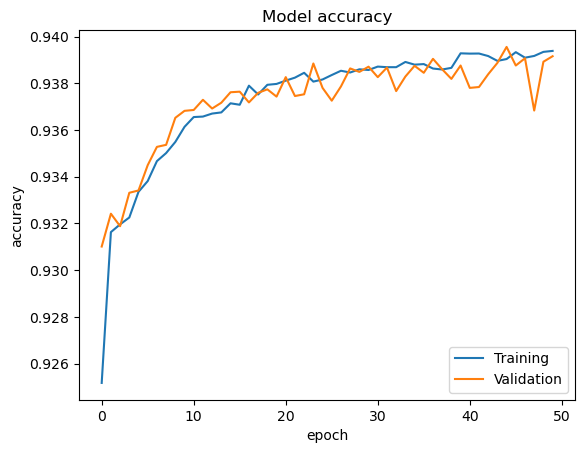

In [31]:
# Model accuracy

fig_1 = plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()

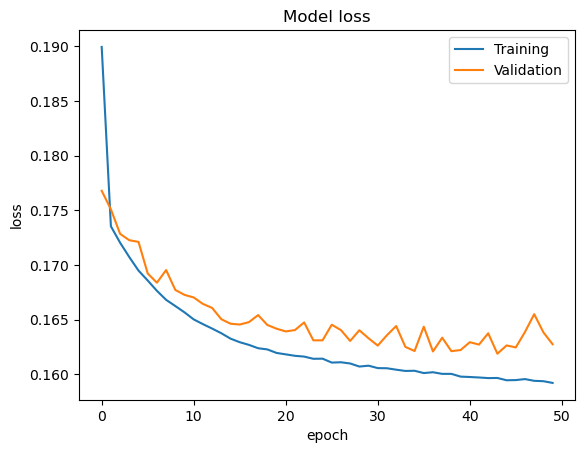

In [32]:
# Model loss

fig_2 = plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

### b. save, read and test Modell

In [ ]:
# save Modell
## model.save("my_model")

In [33]:
# read Modell
model.load_weights('variables')

In [34]:
test = model.evaluate(X_test_norm,y_test)

2513/2513 [==============================] - 2s 833us/step - loss: 0.1582 - accuracy: 0.9413


### c. DummyClassifier

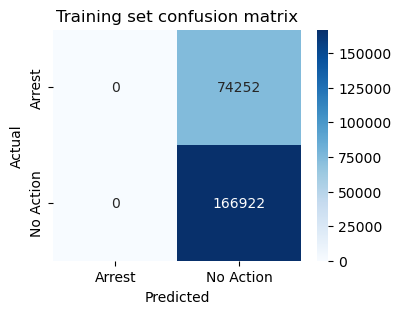

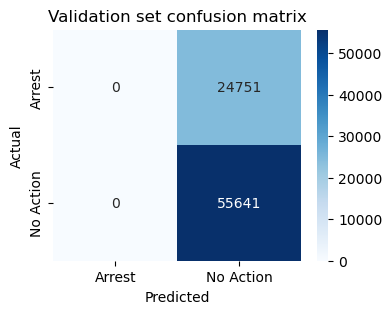

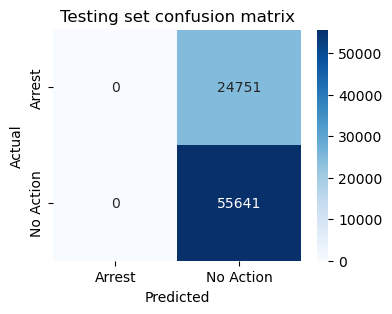

In [35]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train_norm, y_train)

dummy.score(X_test_norm, y_test)

# Create an array with the length of y_test that always has the value 1 (No Action)
y_train_dummy = np.ones(len(y_train))
y_valid_dummy = np.ones(len(y_valid))
y_test_dummy = np.ones(len(y_test))

# Measuring Accuracy Score

cm_train_dummy = confusion_matrix(y_train, y_train_dummy)
cm_valid_dummy = confusion_matrix(y_test, y_valid_dummy)
cm_test_dummy = confusion_matrix(y_test, y_test_dummy)

# confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_train_dummy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Arrest', 'No Action'],
            yticklabels=['Arrest', 'No Action'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training set confusion matrix')
plt.show()

plt.figure(figsize=(4, 3))
sns.heatmap(cm_valid_dummy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Arrest', 'No Action'],
            yticklabels=['Arrest', 'No Action'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation set confusion matrix')
plt.show()

plt.figure(figsize=(4, 3))
sns.heatmap(cm_test_dummy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Arrest', 'No Action'],
            yticklabels=['Arrest', 'No Action'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set confusion matrix')
plt.show()

In [36]:
validation = model.evaluate(X_valid_norm,  y_valid)

2513/2513 [==============================] - 2s 652us/step - loss: 0.1616 - accuracy: 0.9405


In [37]:
# Verwenden Sie den Testdatensatz zur Vorhersage und erhalten Sie die Vorhersage-Wahrscheinlichkeiten
y_pred_prob = model.predict(X_test_norm)

# Wählen Sie die erste Spalte der Vorhersagewahrscheinlichkeiten aus (entspricht der positiven Klasse)
y_pred_prob_positive = y_pred_prob[:, 0]

# Berechnen Sie die Daten für die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)

# Berechnen Sie den ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

2513/2513 [==============================] - 1s 528us/step


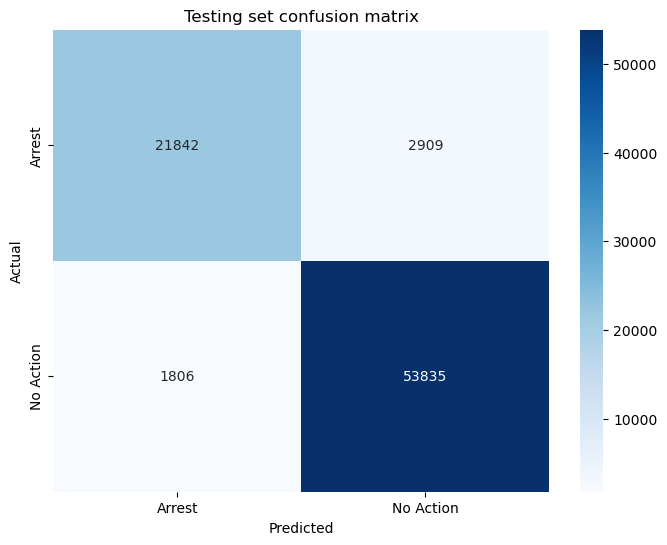

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# fig_ = plt.figure()

# ConfusionMatrixDisplay.from_predictions(y_test, y_pred_prob)
# plt.title('Testing set confusion matrix')

# plt.show()

# Werte größer als 0.5 als positive Klasse betrachten, Werte kleiner oder gleich 0.5 als negative Klasse betrachten
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Berechnen Sie die Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred_binary)

# Erstellen Sie ein Heatmap-Diagramm der Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Arrest', 'No Action'],
            yticklabels=['Arrest', 'No Action'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing set confusion matrix')
plt.show()

### d. Precision-Recall-Curves

In [39]:
from sklearn import metrics
#True/false positives/negatives of the NN
tn_nn, fp_nn, fn_nn, tp_nn = confusion_matrix(y_test, y_pred_binary).ravel()
print('True Positive of NN:\t', tp_nn)
print('True Negative of NN:\t',tn_nn)
print('False Positive of NN:\t', fp_nn)
print('False Negative of NN:\t', fn_nn)

#Accuracy
accuracy_nn = metrics.accuracy_score(y_test, y_pred_binary)
print('The Accuracy:',round(accuracy_nn,2))

True Positive of NN:	 53835
True Negative of NN:	 21842
False Positive of NN:	 2909
False Negative of NN:	 1806
The Accuracy: 0.94


In [40]:
#Standard metrics of performance: recall and precision
recall_nn_manual = tp_nn/(tp_nn + fn_nn)
precision_nn_manual = tp_nn/(tp_nn + fp_nn)

print('Recall of NN:\t\t',round(recall_nn_manual,2))
print('Precision of NN:\t',round(precision_nn_manual,2))

#F1 metric of performance
f1_nn_manual = 2 * precision_nn_manual * recall_nn_manual / (precision_nn_manual + recall_nn_manual)

print('F1 of NN:\t\t',round(f1_nn_manual,2))

Recall of NN:		 0.97
Precision of NN:	 0.95
F1 of NN:		 0.96


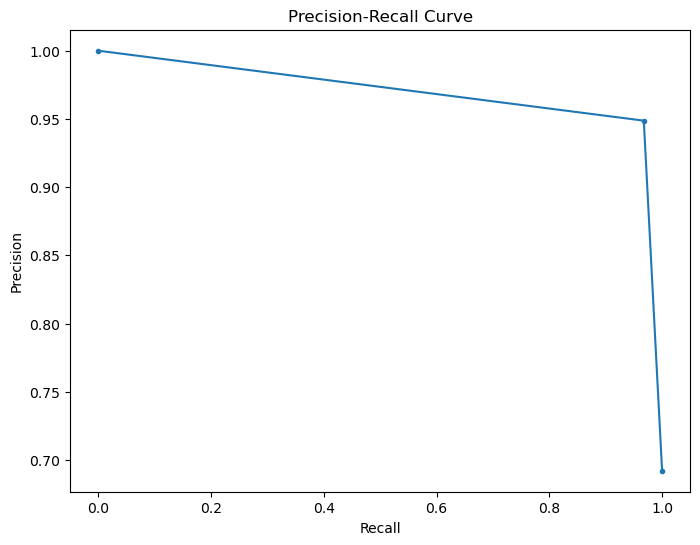

In [41]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision_nn, recall_nn, thresholds = precision_recall_curve(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn, precision_nn, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### e. ROC curve

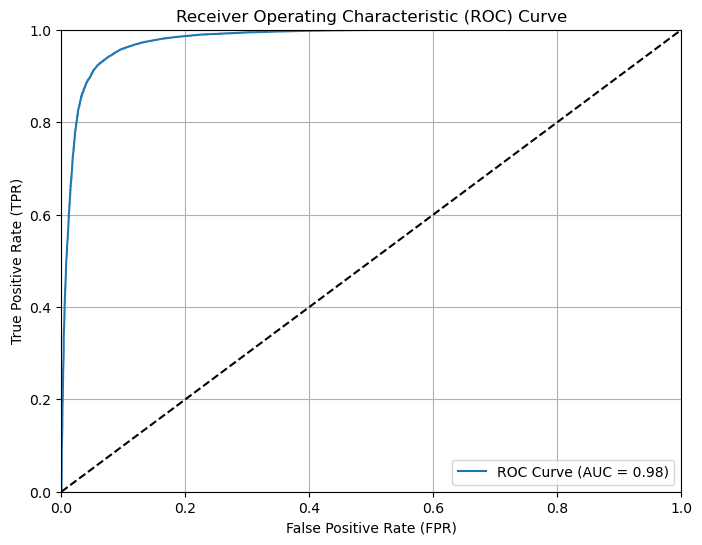

In [42]:
# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

---

# 3. Fairness: Independence, Separation, Sufficiency(neural network)

In [43]:
#Separating the dataset into groups for gender
group_m = X_test["driver_gender"] == 1
group_f = X_test["driver_gender"] == 0

In [44]:
y_pred_female = y_pred_binary[group_f]
y_test_female = y_test[group_f]
X_test_female = X_test_norm[group_f]

y_pred_male = y_pred_binary[group_m]
y_test_male = y_test[group_m]
X_test_male = X_test_norm[group_m]

cm_f = confusion_matrix(y_test_female, y_pred_female)
cm_m = confusion_matrix(y_test_male, y_pred_male)

tn_m, fp_m, fn_m, tp_m = cm_m.ravel()
tn_f, fp_f, fn_f, tp_f = cm_f.ravel()

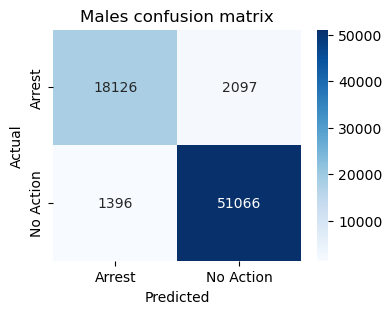

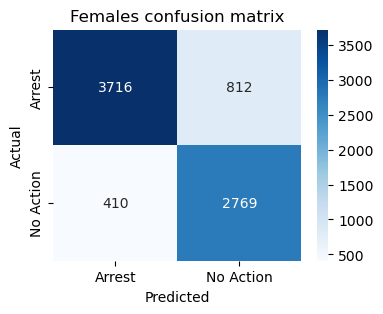

In [45]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm_m, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Arrest', 'No Action'],
            yticklabels=['Arrest', 'No Action'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Males confusion matrix')
plt.show()

plt.figure(figsize=(4, 3))
sns.heatmap(cm_f, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Arrest', 'No Action'],
            yticklabels=['Arrest', 'No Action'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Females confusion matrix')
plt.show()

In [46]:
# Recall, Precision, F1
print("Metric\t\t\t male\t\t female")
print("False positive rate:\t", round(fp_m/(fp_m + tn_m),2), "\t\t", round(fp_f/(fp_f + tn_f),2))

precision_m = tp_m/(tp_m + fp_m)
precision_f = tp_f/(tp_f + fp_f)
recall_m = tp_m/(tp_m + fn_m)
recall_f = tp_f/(tp_f + fn_f)
f1_m = (2 * precision_m * recall_m) / (precision_m + recall_m)
f1_f = (2 * precision_f * recall_f) / (precision_f + recall_f)
accuracy_m = metrics.accuracy_score(y_test[group_m], y_pred_male)
accuracy_f = metrics.accuracy_score(y_test[group_f], y_pred_female)


print('Recall:\t\t\t',round(recall_m,2),'\t\t',round(recall_f,2))
print('Precision:\t\t',round(precision_m,2),'\t\t',round(precision_f,2))
print('F1:\t\t\t',round(f1_m,2),'\t\t',round(f1_f,2))
print('Accuracy:\t\t', round(accuracy_m,2), '\t\t', round(accuracy_f,2))

Metric			 male		 female
False positive rate:	 0.1 		 0.18
Recall:			 0.97 		 0.87
Precision:		 0.96 		 0.77
F1:			 0.97 		 0.82
Accuracy:		 0.95 		 0.84


In [47]:
# Independence, Separation, Sufficiency

independence_m = (tp_m + fp_m) / (tn_m + fp_m + fn_m + tp_m)
independence_f = (tp_f + fp_f) / (tn_f + fp_f + fn_f + tp_f)

print('Independence males:\t',round(independence_m,2))
print('Independence females:\t',round(independence_f,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t',round(independence_m - independence_f,2))


separation1_m = tp_m / (tp_m + fp_m)
separation1_f = tp_f / (tp_f + fp_f)

print('\ntp Separation males:\t',round(separation1_m,2))
print('tp Separation females:\t',round(separation1_f,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t',round(separation1_m - separation1_f,2))

separation2_m = tn_m / (tn_m + fn_m)
separation2_f = tn_f / (tn_f + fn_f)

print('\ntn Separation males:\t',round(separation2_m,2))
print('tn Separation females:\t',round(separation2_f,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t',round(separation2_m - separation2_f,2))


sufficiency1_m = tp_m / (tp_m + fn_m)
sufficiency1_f = tp_f / (tp_f + fn_f)

print('\ntp Sufficiency males:\t',round(sufficiency1_m,2))
print('tp Sufficiency females:\t',round(sufficiency1_f,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t',round(sufficiency1_m - sufficiency1_f,2))

sufficiency2_m = fp_m / (fp_m + tn_m)
sufficiency2_f = fp_f / (fp_f + tn_f)

print('\ntn Sufficiency males:\t',round(sufficiency2_m,2))
print('tn Sufficiency females:\t',round(sufficiency2_f,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t',round(sufficiency2_m - sufficiency2_f,2))
print('\n')

print(f"Accuracy(tp) males:\t {round(tp_m / (tp_m + fp_m + fn_m + tn_m),2)}")
print(f"Accuracy(tp) females:\t {round(tp_f / (tp_f + fp_f + fn_f + tn_f),2)}")

Independence males:	 0.73
Independence females:	 0.46
Difference:		 0.27

tp Separation males:	 0.96
tp Separation females:	 0.77
Difference:		 0.19

tn Separation males:	 0.93
tn Separation females:	 0.9
Difference:		 0.03

tp Sufficiency males:	 0.97
tp Sufficiency females:	 0.87
Difference:		 0.1

tn Sufficiency males:	 0.1
tn Sufficiency females:	 0.18
Difference:		 -0.08


Accuracy(tp) males:	 0.7
Accuracy(tp) females:	 0.36


---

# 4. Without sensitivity list (knn)

## a. without gender

In [48]:
X_new=X_enc[['driver_age','driver_race_Asian','driver_race_Black','driver_race_Hispanic','driver_race_White',
          'violation','search_type','contraband_found', 'drugs_related_stop', 'district', 'year']]

y_new = y_enc

X_new.head()

,driver_age,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_White,violation,search_type,contraband_found,drugs_related_stop,district,year
0,-1.450042,0.0,0.0,0.0,1.0,6.0,2.0,0.0,0.0,34.0,-2.695085
1,-0.989176,0.0,0.0,0.0,1.0,6.0,2.0,0.0,0.0,34.0,-2.695085
2,0.547043,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,34.0,-2.695085
3,-0.989176,0.0,1.0,0.0,0.0,6.0,2.0,0.0,0.0,34.0,-2.695085
4,-1.373231,0.0,0.0,1.0,0.0,6.0,2.0,0.0,0.0,34.0,-2.695085


In [49]:
#
X_new = X_new.astype(np.float32)

#
X_tv_new, X_test_new, y_tv_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=127)
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(X_tv_new, y_tv_new, test_size=0.25, stratify=y_tv_new, random_state=127)

# Replacing the values in our X_train by the normalized ones
X_train_new_norm = X_train_new.copy()
X_train_new_norm.values[:] = scaler.fit_transform(X_train_new)

# Replacing the values in our X_test by the normalized ones
X_test_new_norm = X_test_new.copy()
X_test_new_norm.values[:] = scaler.transform(X_test_new)

# Replacing the values in our X_val by the normalized ones
X_valid_new_norm = X_valid_new.copy()
X_valid_new_norm.values[:] = scaler.transform(X_valid_new)

X_train_new_norm

,driver_age,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_White,violation,search_type,contraband_found,drugs_related_stop,district,year
321042,1.008267,-0.066253,-0.585212,-0.289249,0.745399,-0.172083,0.182647,-0.130229,-0.10492,0.686874,0.710759
88276,0.240569,-0.066253,-0.585212,-0.289249,0.745399,-1.504149,-2.099486,-0.130229,-0.10492,-0.464985,-0.337566
37183,-0.680667,-0.066253,-0.585212,-0.289249,0.745399,2.492049,0.182647,-0.130229,-0.10492,0.020008,-1.910054
116168,0.470879,-0.066253,-0.585212,-0.289249,0.745399,-0.172083,0.182647,-0.130229,-0.10492,-1.253098,-0.075485
51359,-0.834207,-0.066253,-0.585212,-0.289249,0.745399,2.492049,0.182647,-0.130229,-0.10492,1.353739,-1.385892
...,...,...,...,...,...,...,...,...,...,...,...
215688,0.317339,-0.066253,-0.585212,-0.289249,0.745399,-0.172083,0.182647,-0.130229,-0.10492,1.596236,0.448678
15932,-0.066509,-0.066253,-0.585212,-0.289249,0.745399,-0.172083,0.182647,-0.130229,-0.10492,1.656860,-2.434217
265028,-1.678674,-0.066253,-0.585212,-0.289249,0.745399,1.159984,-2.099486,-0.130229,-0.10492,-0.161864,0.448678
246482,0.163800,-0.066253,-0.585212,3.457227,-1.341563,-0.172083,0.182647,-0.130229,-0.10492,1.596236,0.448678


In [50]:
#
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_new_norm, y_train_new)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

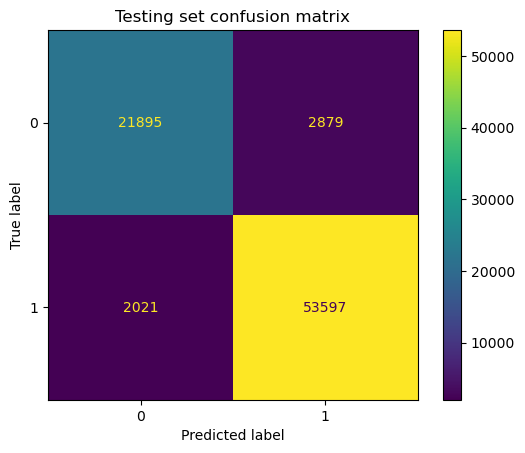

In [51]:
y_test_new_pred = knn.predict(X_test_new_norm)

fig_ = plt.figure()

ConfusionMatrixDisplay.from_predictions(y_test_new, y_test_new_pred)
plt.title('Testing set confusion matrix')

plt.show()

In [52]:
#True/false positives/negatives of the kNN
tn_nknn, fp_nknn, fn_nknn, tp_nknn = confusion_matrix(y_test_new, y_test_new_pred).ravel()
print('True Positive of KNN:\t', tp_nknn)
print('True Negative of KNN:\t',tn_nknn)
print('False Positive of KNN:\t', fp_nknn)
print('False Negative of KNN:\t', fn_nknn)

True Positive of KNN:	 53597
True Negative of KNN:	 21895
False Positive of KNN:	 2879
False Negative of KNN:	 2021


In [53]:
from sklearn import metrics
#Accuracy
accuracy_nknn = metrics.accuracy_score(y_test_new, y_test_new_pred)
print('The Accuracy:',round(accuracy_nknn,2))

The Accuracy: 0.94


In [54]:
#Standard metrics of performance: recall and precision
recall_nknn_manual = tp_nknn/(tp_nknn + fn_nknn)
precision_nknn_manual = tp_nknn/(tp_nknn + fp_nknn)

print('Recall of KNN:\t\t',round(recall_nknn_manual,2))
print('Precision of KNN:\t',round(precision_nknn_manual,2))

#F1 metric of performance
f1_nknn_manual = 2 * precision_nknn_manual * recall_nknn_manual / (precision_nknn_manual + recall_nknn_manual)

print('F1 of KNN:\t\t',round(f1_nknn_manual,2))

Recall of KNN:		 0.96
Precision of KNN:	 0.95
F1 of KNN:		 0.96


[0.  0.2 0.4 0.6 0.8 1. ]


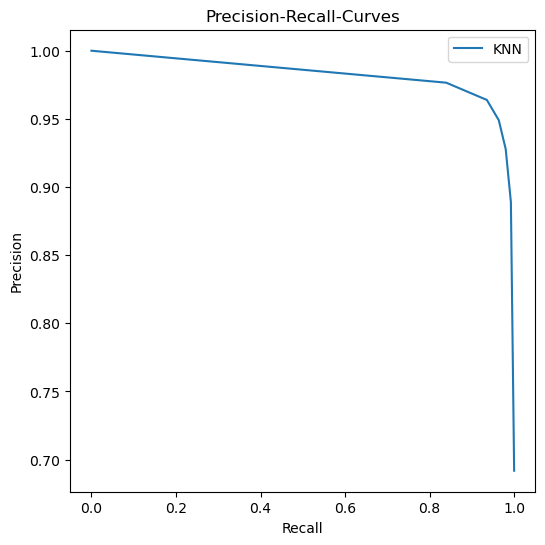

In [55]:
from sklearn.metrics import precision_recall_curve

cm_proba_test_new = knn.predict_proba(X_test_new_norm)[:, 1]
cm_proba_train_new = knn.predict_proba(X_train_new_norm)[:, 1]

precision_nknn, recall_nknn, thresholds = precision_recall_curve(y_test_new, cm_proba_test_new)

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_nknn, precision_nknn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

Train: [2.  1.  0.8 0.6 0.4 0.2 0. ]
Test: [2.  1.  0.8 0.6 0.4 0.2 0. ]


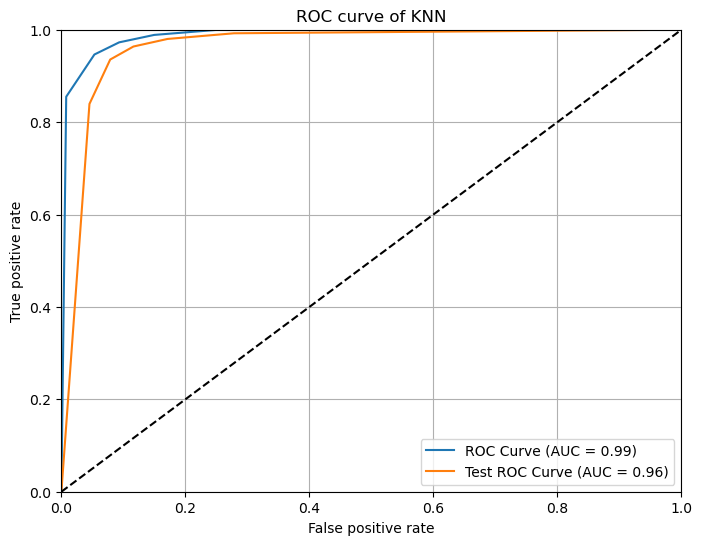

In [56]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train_nknn, tpr_train_nknn, thresholds_train = roc_curve(y_train_new, cm_proba_train_new)
print('Train:',thresholds_train)
fpr_test_nknn, tpr_test_nknn, thresholds_test = roc_curve(y_test_new, cm_proba_test_new)
print('Test:',thresholds_test)

#Calculate the area under the curve
auc_train_nknn = auc(fpr_train_nknn, tpr_train_nknn)
auc_test_nknn = auc(fpr_test_nknn, tpr_test_nknn)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_nknn, tpr_train_nknn, label=f'ROC Curve (AUC = {auc_train_nknn:.2f})')
plt.plot(fpr_test_nknn, tpr_test_nknn, label=f'Test ROC Curve (AUC = {auc_test_nknn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## b. without all sensitivity list

In [57]:
X_new=X_enc[['violation','search_type','contraband_found', 'drugs_related_stop', 'district', 'year']]

y_new = y_enc

X_new.head()

,violation,search_type,contraband_found,drugs_related_stop,district,year
0,6.0,2.0,0.0,0.0,34.0,-2.695085
1,6.0,2.0,0.0,0.0,34.0,-2.695085
2,6.0,2.0,0.0,0.0,34.0,-2.695085
3,6.0,2.0,0.0,0.0,34.0,-2.695085
4,6.0,2.0,0.0,0.0,34.0,-2.695085


In [58]:
#
X_new = X_new.astype(np.float32)

#
X_tv_new, X_test_new, y_tv_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=127)
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(X_tv_new, y_tv_new, test_size=0.25, stratify=y_tv_new, random_state=127)

# Replacing the values in our X_train by the normalized ones
X_train_new_norm = X_train_new.copy()
X_train_new_norm.values[:] = scaler.fit_transform(X_train_new)

# Replacing the values in our X_test by the normalized ones
X_test_new_norm = X_test_new.copy()
X_test_new_norm.values[:] = scaler.transform(X_test_new)

# Replacing the values in our X_val by the normalized ones
X_valid_new_norm = X_valid_new.copy()
X_valid_new_norm.values[:] = scaler.transform(X_valid_new)

X_train_new_norm

,violation,search_type,contraband_found,drugs_related_stop,district,year
321042,-0.172083,0.182647,-0.130229,-0.10492,0.686874,0.710759
88276,-1.504149,-2.099486,-0.130229,-0.10492,-0.464985,-0.337566
37183,2.492049,0.182647,-0.130229,-0.10492,0.020008,-1.910054
116168,-0.172083,0.182647,-0.130229,-0.10492,-1.253098,-0.075485
51359,2.492049,0.182647,-0.130229,-0.10492,1.353739,-1.385892
...,...,...,...,...,...,...
215688,-0.172083,0.182647,-0.130229,-0.10492,1.596236,0.448678
15932,-0.172083,0.182647,-0.130229,-0.10492,1.656860,-2.434217
265028,1.159984,-2.099486,-0.130229,-0.10492,-0.161864,0.448678
246482,-0.172083,0.182647,-0.130229,-0.10492,1.596236,0.448678


In [59]:
#
knn_n = KNeighborsClassifier(n_neighbors = 5)

knn_n.fit(X_train_new_norm, y_train_new)

KNeighborsClassifier()

<Figure size 640x480 with 0 Axes>

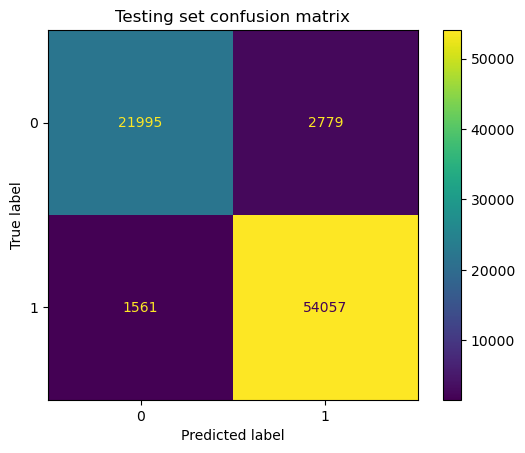

In [60]:
y_test_new_pred = knn_n.predict(X_test_new_norm)

fig_ = plt.figure()

ConfusionMatrixDisplay.from_predictions(y_test_new, y_test_new_pred)
plt.title('Testing set confusion matrix')

plt.show()

In [61]:
#True/false positives/negatives of the kNN
tn_nknn, fp_nknn, fn_nknn, tp_nknn = confusion_matrix(y_test_new, y_test_new_pred).ravel()
print('True Positive of KNN:\t', tp_nknn)
print('True Negative of KNN:\t',tn_nknn)
print('False Positive of KNN:\t', fp_nknn)
print('False Negative of KNN:\t', fn_nknn)

True Positive of KNN:	 54057
True Negative of KNN:	 21995
False Positive of KNN:	 2779
False Negative of KNN:	 1561


In [62]:
#Accuracy
accuracy_nknn = metrics.accuracy_score(y_test_new, y_test_new_pred)
print('The Accuracy:',round(accuracy_nknn,2))

The Accuracy: 0.95


In [63]:
#Standard metrics of performance: recall and precision
recall_nknn_manual = tp_nknn/(tp_nknn + fn_nknn)
precision_nknn_manual = tp_nknn/(tp_nknn + fp_nknn)

print('Recall of KNN:\t\t',round(recall_nknn_manual,2))
print('Precision of KNN:\t',round(precision_nknn_manual,2))

#F1 metric of performance
f1_nknn_manual = 2 * precision_nknn_manual * recall_nknn_manual / (precision_nknn_manual + recall_nknn_manual)

print('F1 of KNN:\t\t',round(f1_nknn_manual,2))

Recall of KNN:		 0.97
Precision of KNN:	 0.95
F1 of KNN:		 0.96


[0.  0.2 0.4 0.6 0.8 1. ]


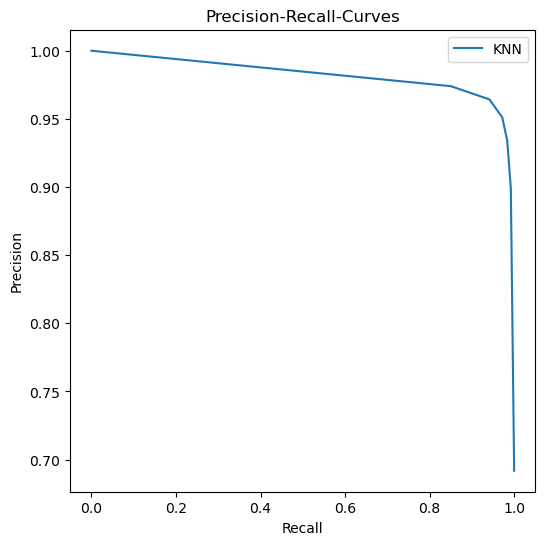

In [64]:
cm_proba_test_new = knn_n.predict_proba(X_test_new_norm)[:, 1]
cm_proba_train_new = knn_n.predict_proba(X_train_new_norm)[:, 1]

precision_nknn, recall_nknn, thresholds = precision_recall_curve(y_test_new, cm_proba_test_new)

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_nknn, precision_nknn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

Train: [2.  1.  0.8 0.6 0.4 0.2 0. ]
Test: [2.  1.  0.8 0.6 0.4 0.2 0. ]


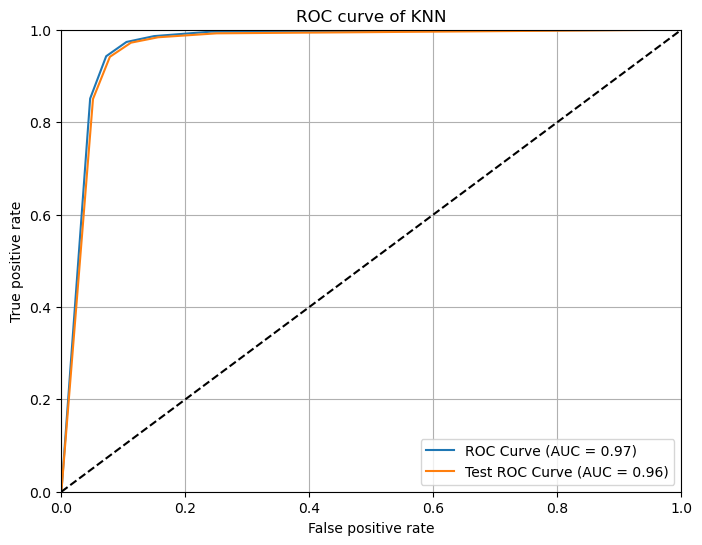

In [65]:
#Calculate the false positive and true positive rates for training and test set
fpr_train_nknn, tpr_train_nknn, thresholds_train = roc_curve(y_train_new, cm_proba_train_new)
print('Train:',thresholds_train)
fpr_test_nknn, tpr_test_nknn, thresholds_test = roc_curve(y_test_new, cm_proba_test_new)
print('Test:',thresholds_test)

#Calculate the area under the curve
auc_train_nknn = auc(fpr_train_nknn, tpr_train_nknn)
auc_test_nknn = auc(fpr_test_nknn, tpr_test_nknn)

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_nknn, tpr_train_nknn, label=f'ROC Curve (AUC = {auc_train_nknn:.2f})')
plt.plot(fpr_test_nknn, tpr_test_nknn, label=f'Test ROC Curve (AUC = {auc_test_nknn:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## c. Fairness: Independence, Separation, Sufficiency (without all s.l.)

In [68]:
X_test_new.head()

,violation,search_type,contraband_found,drugs_related_stop,district,year
222121,2.0,2.0,0.0,0.0,24.0,0.449341
229719,2.0,2.0,0.0,0.0,24.0,0.449341
257815,2.0,2.0,0.0,0.0,13.0,0.449341
314599,2.0,2.0,0.0,0.0,40.0,0.711377
252996,2.0,2.0,0.0,0.0,13.0,0.449341


In [79]:
group_m = X_test["driver_gender"] == 1
group_f = X_test["driver_gender"] == 0

# Create the same boolean index for y_test_new and X_test_new
bool_index_m = group_m.values
bool_index_f = group_f.values

# Select subset using boolean index
y_test_new_m = y_test_new[bool_index_m]
X_test_new_m = X_test_new[bool_index_m]

y_test_new_f = y_test_new[bool_index_f]
X_test_new_f = X_test_new[bool_index_f]

len(y_test_new_m)

72685

In [80]:
cm_m_new = confusion_matrix(y_test_new_m, knn_n.predict(X_test_new_m))
cm_f_new = confusion_matrix(y_test_new_f, knn_n.predict(X_test_new_f))

tn_m_new, fp_m_new, fn_m_new, tp_m_new = cm_m_new.ravel()
tn_f_new, fp_f_new, fn_f_new, tp_f_new = cm_f_new.ravel()

In [81]:
#Generating metrics of fairness: independence, separation (1 and 2), and sufficiency (1 and 2)
independence_m_new = (tp_m_new + fp_m_new) / (tn_m_new + fp_m_new + fn_m_new + tp_m_new)
independence_f_new = (tp_f_new + fp_f_new) / (tn_f_new + fp_f_new + fn_f_new + tp_f_new)

separation1_m_new = tp_m_new / (tp_m_new + fp_m_new)
separation1_f_new = tp_f_new / (tp_f_new + fp_f_new)

separation2_m_new = tn_m_new / (tn_m_new + fn_m_new)
separation2_f_new = tn_f_new / (tn_f_new + fn_f_new)

sufficiency1_m_new = tp_m_new / (tp_m_new + fn_m_new)
sufficiency1_f_new = tp_f_new / (tp_f_new + fn_f_new)

sufficiency2_m_new = fp_m_new / (fp_m_new + tn_m_new)
sufficiency2_f_new = fp_f_new / (fp_f_new + tn_f_new)

In [82]:
print("Feature\t", "males\t", "females","\n",
"ind\t",round(independence_m_new, 2), "\t", round(independence_f_new,2), "\n",
"tp_sep\t", round(separation1_m_new,2), "\t",round(separation1_f_new,2), "\n",
"tn_sep\t", round(separation2_m_new,2), "\t",round(separation2_f_new,2), "\n",
"tp_suf\t", round(sufficiency1_m_new,2), "\t",round(sufficiency1_f_new,2), "\n",
"tn_suf\t", round(sufficiency2_m_new,2), "\t",round(sufficiency2_f_new,2), "\n")

print("Differences\t", "With Sensitive\t", "Without Sensitive","\n",
      "Independence\t\t", round(independence_m-independence_f,2), "\t\t", round(independence_m_new-independence_f_new,2), "\n",
      "tp_Separation\t\t", round(separation1_m-separation1_f,2), "\t\t", round(separation1_m_new-separation1_f_new,2), "\n",
      "tn_Separation 2\t", round(separation2_m-separation2_f,2), "\t\t", round(separation2_m_new-separation2_f_new,2), "\n",
      "tp_Sufficiency 1\t", round(sufficiency1_m-sufficiency1_f,2), "\t\t", round(sufficiency1_m_new-sufficiency1_f_new,2), "\n",
      "tn_Sufficiency 2\t", round(sufficiency2_m-sufficiency2_f,2), "\t\t", round(sufficiency2_m_new-sufficiency2_f_new,2), "\n"
      )

Feature	 males	 females 
 ind	 0.05 	 0.05 
 tp_sep	 0.04 	 0.03 
 tn_sep	 0.27 	 0.27 
 tp_suf	 0.0 	 0.0 
 tn_suf	 0.15 	 0.15 

Differences	 With Sensitive	 Without Sensitive 
 Independence		 0.27 		 0.0 
 tp_Separation		 0.19 		 0.01 
 tn_Separation 2	 0.03 		 0.0 
 tp_Sufficiency 1	 0.1 		 0.0 
 tn_Sufficiency 2	 -0.08 		 -0.0 



---

# 5. Different thresholds

 We consider to take 0.3, 0.5, and 0.8 as the thresholds.

In [83]:
# Replacing the values in our X_train by the normalized ones
X_train_norm = X_train.copy()
X_train_norm.values[:] = scaler.fit_transform(X_train)

# Replacing the values in our X_test by the normalized ones
X_test_norm = X_test.copy()
X_test_norm.values[:] = scaler.transform(X_test)

In [84]:
knn_alt = KNeighborsClassifier(n_neighbors = 5)

knn_alt.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [85]:
#model trained with sensitive features
#transform the prediction as decimals which presents the probability of being 1
pred_proba = knn_alt.predict_proba(X_test)[:, 1]
prob_placeholder = pred_proba.copy()

### a. Accuracy, Recall, Precision & F1 at Different Threshold

In [86]:
cm_m=[]
accuracy_range = []
recall_range = []
precision_range = []
f1_range = []
thresholds = np.arange(0.05,1.00,0.05)
y_test_grp = y_test.copy()
y_test_grp = y_test_grp[group_m]

for my_threshold in thresholds:
  pred_proba = prob_placeholder.copy()
  pred_proba = pred_proba[group_m]

  pred_proba[np.where(pred_proba >= my_threshold)]=1
  pred_proba[np.where(pred_proba < my_threshold)]=0

  accuracy_range.append(metrics.accuracy_score(y_test_grp, pred_proba))
  recall_range.append(metrics.recall_score(y_test_grp, pred_proba))
  precision_range.append(metrics.precision_score(y_test_grp, pred_proba)) 
  f1_range.append(metrics.f1_score(y_test_grp, pred_proba))  
  
  cm_m_ = confusion_matrix(y_test_grp, pred_proba)

  cm_m.append(cm_m_)

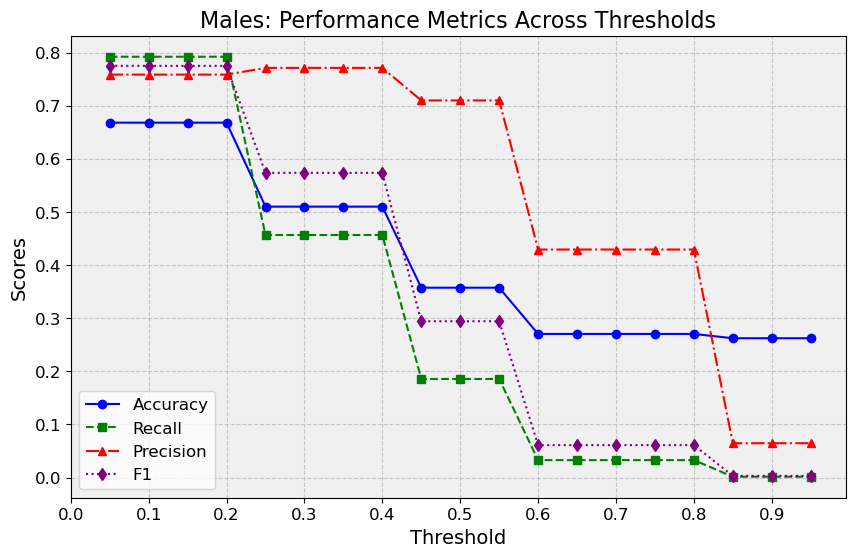

In [87]:
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.plot(thresholds, accuracy_range, label='Accuracy', linestyle='-', marker='o', color='blue')
plt.plot(thresholds, recall_range, label='Recall', linestyle='--', marker='s', color='green')
plt.plot(thresholds, precision_range, label='Precision', linestyle='-.', marker='^', color='red')
plt.plot(thresholds, f1_range, label='F1', linestyle=':', marker='d', color='purple')

plt.legend(loc='lower left', fontsize=12)  # Set the legend position and font size
plt.xticks(np.arange(min(thresholds)-0.05, max(thresholds)+0.05, 0.1), fontsize=12)  # Set x-axis ticks and font size
plt.yticks(fontsize=12)  # Set y-axis ticks font size
plt.title('Males: Performance Metrics Across Thresholds', fontsize=16)  # Set the chart title and font size
plt.xlabel('Threshold', fontsize=14)  # Set x-axis label and font size
plt.ylabel('Scores', fontsize=14)  # Set y-axis label and font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with line style and transparency
plt.gca().set_facecolor('#f0f0f0')  # Set the chart background color

plt.show()

In [88]:
cm_f=[]
accuracy_range = []
recall_range = []
precision_range = []
f1_range = []
thresholds = np.arange(0.05,1.00,0.05)
y_test_grp = y_test.copy()
y_test_grp = y_test_grp[group_f]

for my_threshold in thresholds:
  pred_proba = prob_placeholder.copy()
  pred_proba = pred_proba[group_f]

  pred_proba[np.where(pred_proba >= my_threshold)]=1
  pred_proba[np.where(pred_proba < my_threshold)]=0
  
  accuracy_range.append(metrics.accuracy_score(y_test_grp, pred_proba))
  recall_range.append(metrics.recall_score(y_test_grp, pred_proba))
  precision_range.append(metrics.precision_score(y_test_grp, pred_proba)) 
  f1_range.append(metrics.f1_score(y_test_grp, pred_proba))  
  
  cm_f_ = confusion_matrix(y_test_grp, pred_proba)

  cm_f.append(cm_f_)

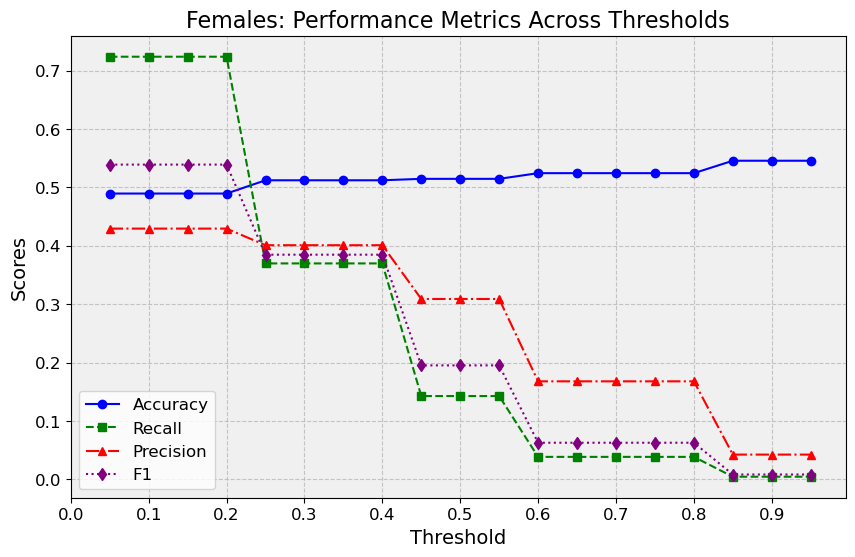

In [89]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(thresholds, accuracy_range, label='Accuracy', linestyle='-', marker='o', color='blue')
plt.plot(thresholds, recall_range, label='Recall', linestyle='--', marker='s', color='green')
plt.plot(thresholds, precision_range, label='Precision', linestyle='-.', marker='^', color='red')
plt.plot(thresholds, f1_range, label='F1', linestyle=':', marker='d', color='purple')

plt.legend(loc='lower left', fontsize=12)  # Set the legend position and font size
plt.xticks(np.arange(min(thresholds)-0.05, max(thresholds)+0.05, 0.1), fontsize=12)  # Set x-axis ticks and font size
plt.yticks(fontsize=12)  # Set y-axis ticks font size
plt.title('Females: Performance Metrics Across Thresholds', fontsize=16)  # Set the chart title and font size
plt.xlabel('Threshold', fontsize=14)  # Set x-axis label and font size
plt.ylabel('Scores', fontsize=14)  # Set y-axis label and font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with line style and transparency
plt.gca().set_facecolor('#f0f0f0')  # Set the chart background color

plt.show()

 ### b. Fairness: Ind., Sep. & Suff. at Different Threshold

In [90]:
independence_m_t = []
independence_f_t = []
separation_1_m_t = []
separation_1_f_t = []
separation_2_m_t = []
separation_2_f_t = []
sufficiency_1_m_t = []
sufficiency_1_f_t = []
sufficiency_2_m_t = []
sufficiency_2_f_t = []

for cm_m_t,cm_f_t in zip(cm_m,cm_f):
  tn_m_t, fp_m_t, fn_m_t, tp_m_t = cm_m_t.ravel()
  tn_f_t, fp_f_t, fn_f_t, tp_f_t = cm_f_t.ravel()
    
  #independence
  independence_m_t.append((tp_m_t + fp_m_t) / (tn_m_t + fp_m_t + fn_m_t + tp_m_t))
  independence_f_t.append((tp_f_t + fp_f_t) / (tn_f_t + fp_f_t + fn_f_t + tp_f_t)) 

  #tn_separation
  separation_1_m_t.append(tp_m_t / (tp_m_t + fp_m_t)) 
  separation_1_f_t.append(tp_f_t / (tp_f_t + fp_f_t))
    
  #tp_separation
  separation_2_m_t.append(tn_m_t / (tn_m_t + fn_m_t))
  separation_2_f_t.append(tn_f_t / (tn_f_t + fn_f_t))

  #tn_sufficiency
  sufficiency_1_m_t.append(tp_m_t / (tp_m_t + fn_m_t))
  sufficiency_1_f_t.append(tp_f_t / (tp_f_t + fn_f_t))
    
  #tp_sufficiency
  sufficiency_2_m_t.append(fp_m_t / (fp_m_t + tn_m_t))
  sufficiency_2_f_t.append(fp_f_t / (fp_f_t + tn_f_t))

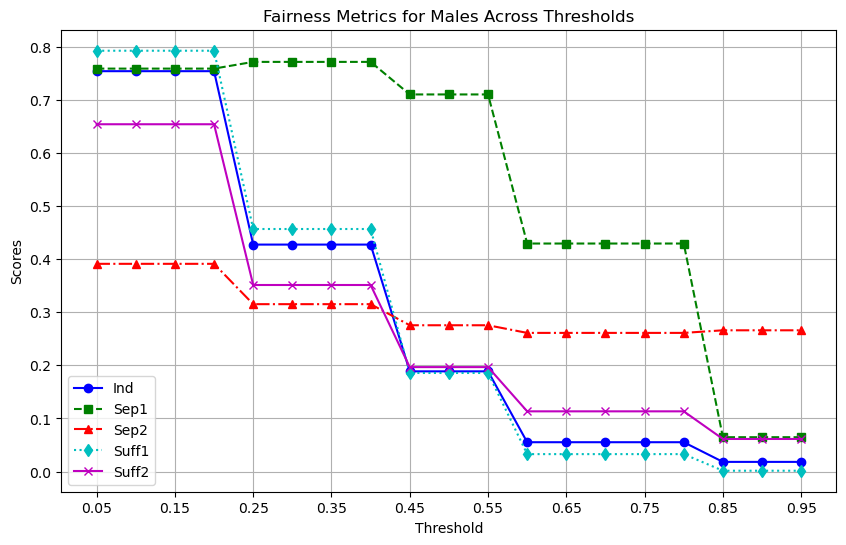

In [91]:
# Adjust the figure size
plt.figure(figsize=(10, 6))  

# Choose different colors and line styles for each curve
plt.plot(thresholds, independence_m_t, label="Ind", linestyle='-', marker='o', color='b')
plt.plot(thresholds, separation_1_m_t, label="Sep1", linestyle='--', marker='s', color='g')
plt.plot(thresholds, separation_2_m_t, label="Sep2", linestyle='-.', marker='^', color='r')
plt.plot(thresholds, sufficiency_1_m_t, label="Suff1", linestyle=':', marker='d', color='c')
plt.plot(thresholds, sufficiency_2_m_t, label="Suff2", linestyle='-', marker='x', color='m')

# Adjust legend position and style
plt.legend(loc='lower left')

# Adjust ticks
plt.xticks(np.arange(min(thresholds), max(thresholds) + 0.1, 0.1))

# Add title and labels
plt.title('Fairness Metrics for Males Across Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Scores')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

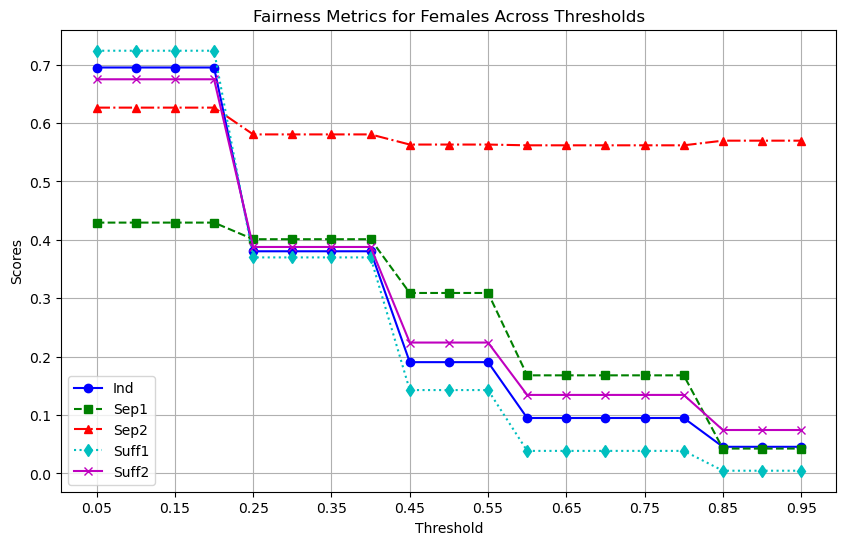

In [92]:
# Adjust the figure size
plt.figure(figsize=(10, 6))

# Choose different colors and line styles for each curve
plt.plot(thresholds, independence_f_t, label="Ind", linestyle='-', marker='o', color='b')
plt.plot(thresholds, separation_1_f_t, label="Sep1", linestyle='--', marker='s', color='g')
plt.plot(thresholds, separation_2_f_t, label="Sep2", linestyle='-.', marker='^', color='r')
plt.plot(thresholds, sufficiency_1_f_t, label="Suff1", linestyle=':', marker='d', color='c')
plt.plot(thresholds, sufficiency_2_f_t, label="Suff2", linestyle='-', marker='x', color='m')

# Adjust legend position and style
plt.legend(loc='lower left')

# Adjust ticks
plt.xticks(np.arange(min(thresholds), max(thresholds) + 0.1, 0.1))

# Add title and labels
plt.title('Fairness Metrics for Females Across Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Scores')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

### c. optimal Threshold

In [93]:
best_threshold = None
best_metric_value = -float('inf')  # Initialize the best metric value to negative infinity
selected_metric = "Accuracy"  # You can choose a different metric such as "Recall", "Precision", or "F1 Score"

for threshold, metric_value in zip(thresholds, accuracy_range):  # Here, "Accuracy" is chosen, but you can change it to another metric
    if selected_metric == "Recall":
        metric_value = recall_range[thresholds.tolist().index(threshold)]
    elif selected_metric == "Precision":
        metric_value = precision_range[thresholds.tolist().index(threshold)]
    elif selected_metric == "F1 Score":
        metric_value = f1_range[thresholds.tolist().index(threshold)]

    if metric_value > best_metric_value:
        best_metric_value = metric_value
        best_threshold = threshold

print(f"Best Threshold for {selected_metric}: {best_threshold}")
print(f"Best {selected_metric}: {best_metric_value}")

Best Threshold for Accuracy: 0.8500000000000001
Best Accuracy: 0.5457376411054885


In [94]:
best_threshold = None
best_fairness_score = -float('inf')  # Initialize the best fairness score to negative infinity
weights = [1, 1, 1]  # You can adjust the weights for different metrics as needed

for threshold, indep, sep, suff in zip(thresholds, independence_m_t, separation_1_m_t, sufficiency_1_m_t):
    # Calculate the weighted average fairness score, you can adjust weights as needed
    fairness_score = (weights[0] * indep + weights[1] * sep + weights[2] * suff) / sum(weights)

    if fairness_score > best_fairness_score:
        best_fairness_score = fairness_score
        best_threshold = threshold

print(f"Best Threshold for Fairness: {best_threshold}")
print(f"Best Fairness Score: {best_fairness_score}")

Best Threshold for Fairness: 0.05
Best Fairness Score: 0.7682622572085943


In [95]:
best_threshold = None
best_fairness_score = -float('inf')  # Initialize the best fairness score to negative infinity
weights = [1, 1, 1]  # You can adjust the weights for different metrics as needed

for threshold, indep, sep, suff in zip(thresholds, independence_f_t, separation_1_f_t, sufficiency_1_f_t):
    # Calculate the weighted average fairness score, you can adjust weights as needed
    fairness_score = (weights[0] * indep + weights[1] * sep + weights[2] * suff) / sum(weights)

    if fairness_score > best_fairness_score:
        best_fairness_score = fairness_score
        best_threshold = threshold

print(f"Best Threshold for Fairness: {best_threshold}")
print(f"Best Fairness Score: {best_fairness_score}")

Best Threshold for Fairness: 0.05
Best Fairness Score: 0.6161421221541528
